# Parte 2

## Introducción al Set de Datos

Se nos provee de un dataframe que contiene información de diferentes canciones de Spotify. Se debe realizar un análisis exploratorio del mismo.

TO DO:

- Sacar los min/max y cambiarlo por un `df.describe()`
- Sacar warnings

## Import y limpieza del Dataframe

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [70]:
df = pd.read_csv('../data/dataset_spotify.csv')
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Dance,99,"0,04","0,73",190440,"0,55","0,11","(5,29)","0,09","170,00","0,34",NaN,Cluster,NaN,NaN,NaN,NaN,NaN,NaN
1,Dance,83,"0,11","0,78",208787,"0,61","0,13","(4,59)","0,05","100,07","0,80",NaN,genre,Género,musical,correspondiente,a,la,canción.
2,Dance,87,"0,04","0,74",222653,"0,64","0,35","(4,55)","0,04","105,01","0,57",NaN,popularity,índice de popularidad de la canción,NaN,NaN,NaN,NaN,NaN
3,Dance,78,"0,02","0,59",220573,"0,70","0,06","(5,33)","0,04","104,96","0,25",NaN,acousticness,medida de confianza de si la canción es acústica,NaN,NaN,NaN,NaN,NaN
4,Dance,72,"0,42","0,73",200773,"0,65","0,09","(4,39)","0,05","103,98","0,46",NaN,danceability,adecuación para ser bailada,NaN,NaN,NaN,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int64  
 2   acousticness  1000 non-null   object 
 3   danceability  1000 non-null   object 
 4   duration_ms   1000 non-null   int64  
 5   energy        1000 non-null   object 
 6   liveness      1000 non-null   object 
 7   loudness      1000 non-null   object 
 8   speechiness   1000 non-null   object 
 9   tempo         1000 non-null   object 
 10  valence       1000 non-null   object 
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   12 non-null     object 
 13  Unnamed: 13   11 non-null     object 
 14  Unnamed: 14   1 non-null      object 
 15  Unnamed: 15   1 non-null      object 
 16  Unnamed: 16   1 non-null      object 
 17  Unnamed: 17   1 non-null      object 
 18  Unnamed: 18   1 non-null     

Tenemos nuestro dataframe importado. Por lo que ahora debemos limpiarlo y hacer el preprocesamiento previo al análisis exploratorio. Debemos:

- Quitar las columnas y valores NaN/nulos.
- Tomar los campos que son `Object` y parsearlos a los campos numéricos correspondientes.
- Cambiar los tipos de las columnas para disminuir el tamaño que necesita el dataframe.

### Extracción de Valores Nulos

Las siguientes columnas se autogeneraron pues el `.csv` descargado desde el excel tienen datos nulos o metadata que ya fue extraída para el análisis a realizar:

In [72]:
unnamedColumns = list(df.filter(regex='Unnamed'))
unnamedColumns

['Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [73]:
df = df[df.columns.drop(unnamedColumns)]
df

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99,"0,04","0,73",190440,"0,55","0,11","(5,29)","0,09","170,00","0,34"
1,Dance,83,"0,11","0,78",208787,"0,61","0,13","(4,59)","0,05","100,07","0,80"
2,Dance,87,"0,04","0,74",222653,"0,64","0,35","(4,55)","0,04","105,01","0,57"
3,Dance,78,"0,02","0,59",220573,"0,70","0,06","(5,33)","0,04","104,96","0,25"
4,Dance,72,"0,42","0,73",200773,"0,65","0,09","(4,39)","0,05","103,98","0,46"
...,...,...,...,...,...,...,...,...,...,...,...
995,Soul,42,"0,73","0,59",146693,"0,38","0,39","(8,91)","0,03","85,21","0,64"
996,Soul,43,"0,00","0,45",175427,"0,64","0,13","(5,67)","0,03","89,85","0,09"
997,Soul,41,"0,00","0,51",303640,"0,62","0,11","(7,07)","0,20","91,90","0,25"
998,Soul,44,"0,43","0,67",246787,"0,57","0,12","(5,68)","0,08","97,13","0,51"


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genre         1000 non-null   object
 1   popularity    1000 non-null   int64 
 2   acousticness  1000 non-null   object
 3   danceability  1000 non-null   object
 4   duration_ms   1000 non-null   int64 
 5   energy        1000 non-null   object
 6   liveness      1000 non-null   object
 7   loudness      1000 non-null   object
 8   speechiness   1000 non-null   object
 9   tempo         1000 non-null   object
 10  valence       1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


Vemos que todas las columnas son `non-null` por lo que ahora ninguna de estas posee datos nulos.

### Transformación de Columnas Object

Notamos que columnas como `genre` y `popularity` están bien tipadas, pues tiene sentido que el texto sea de tipo `object` y el número de tipo `int64`. La gran mayoría del resto de columnas debería ser `int` o `float` por lo que vamos a arreglarlo.

Vamos a tomar el feature `acousticness` de ejemplo. Parsearemos el mismo para pasarlo a punto flotante, quitando los espacios innecesarios en el string e intercambiando las comas por puntos.

In [75]:
df['acousticness'] = df['acousticness'].apply(lambda x: x.strip()\
                                                         .replace(',','.'))
df

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99,0.04,"0,73",190440,"0,55","0,11","(5,29)","0,09","170,00","0,34"
1,Dance,83,0.11,"0,78",208787,"0,61","0,13","(4,59)","0,05","100,07","0,80"
2,Dance,87,0.04,"0,74",222653,"0,64","0,35","(4,55)","0,04","105,01","0,57"
3,Dance,78,0.02,"0,59",220573,"0,70","0,06","(5,33)","0,04","104,96","0,25"
4,Dance,72,0.42,"0,73",200773,"0,65","0,09","(4,39)","0,05","103,98","0,46"
...,...,...,...,...,...,...,...,...,...,...,...
995,Soul,42,0.73,"0,59",146693,"0,38","0,39","(8,91)","0,03","85,21","0,64"
996,Soul,43,0.00,"0,45",175427,"0,64","0,13","(5,67)","0,03","89,85","0,09"
997,Soul,41,0.00,"0,51",303640,"0,62","0,11","(7,07)","0,20","91,90","0,25"
998,Soul,44,0.43,"0,67",246787,"0,57","0,12","(5,68)","0,08","97,13","0,51"


Ahora vemos que el máximo valor de esta columna es de 1, por lo que podemos dejar nuestro dato en un campo de tipo `float32` para que el tipo sea correcto.

In [76]:
df.acousticness.max()

'1.00'

In [77]:
df['acousticness'] = df['acousticness'].astype(np.float32)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int64  
 2   acousticness  1000 non-null   float32
 3   danceability  1000 non-null   object 
 4   duration_ms   1000 non-null   int64  
 5   energy        1000 non-null   object 
 6   liveness      1000 non-null   object 
 7   loudness      1000 non-null   object 
 8   speechiness   1000 non-null   object 
 9   tempo         1000 non-null   object 
 10  valence       1000 non-null   object 
dtypes: float32(1), int64(2), object(8)
memory usage: 82.2+ KB


In [79]:
df.acousticness.max()

1.0

Ahora debemos repetir el mismo proceso para todas las columnas que queremos transformar a `float`.

In [80]:
df.head(10)

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99,0.04,"0,73",190440,"0,55","0,11","(5,29)","0,09","170,00","0,34"
1,Dance,83,0.11,"0,78",208787,"0,61","0,13","(4,59)","0,05","100,07","0,80"
2,Dance,87,0.04,"0,74",222653,"0,64","0,35","(4,55)","0,04","105,01","0,57"
3,Dance,78,0.02,"0,59",220573,"0,70","0,06","(5,33)","0,04","104,96","0,25"
4,Dance,72,0.42,"0,73",200773,"0,65","0,09","(4,39)","0,05","103,98","0,46"
5,Dance,73,0.01,"0,62",173082,"0,87","0,20","(4,92)","0,04","98,03","0,58"
6,Dance,71,0.06,"0,80",190347,"0,70","0,10","(5,22)","0,11","120,00","0,80"
7,Dance,68,0.02,"0,58",202439,"0,68","0,08","(4,96)","0,04","129,97","0,04"
8,Dance,72,0.17,"0,66",263040,"0,82","0,06","(6,61)","0,03","111,35","0,68"
9,Dance,64,0.07,"0,71",256040,"0,91","0,50","(5,77)","0,04","98,60","0,94"


In [81]:
to_transform = ['danceability', 'energy', 'liveness', 'speechiness',
                'valence', 'loudness', 'tempo']
for col in to_transform:
    df[col] = df[col].apply(lambda x: x.strip()\
                                       .replace(',','.')\
                                       .replace('(', '')\
                                       .replace(')', ''))\
                     .astype(np.float32)
df.head(10)

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99,0.04,0.73,190440,0.55,0.11,5.29,0.09,170.000000,0.34
1,Dance,83,0.11,0.78,208787,0.61,0.13,4.59,0.05,100.070000,0.80
2,Dance,87,0.04,0.74,222653,0.64,0.35,4.55,0.04,105.010002,0.57
3,Dance,78,0.02,0.59,220573,0.70,0.06,5.33,0.04,104.959999,0.25
4,Dance,72,0.42,0.73,200773,0.65,0.09,4.39,0.05,103.980003,0.46
5,Dance,73,0.01,0.62,173082,0.87,0.20,4.92,0.04,98.029999,0.58
6,Dance,71,0.06,0.80,190347,0.70,0.10,5.22,0.11,120.000000,0.80
7,Dance,68,0.02,0.58,202439,0.68,0.08,4.96,0.04,129.970001,0.04
8,Dance,72,0.17,0.66,263040,0.82,0.06,6.61,0.03,111.349998,0.68
9,Dance,64,0.07,0.71,256040,0.91,0.50,5.77,0.04,98.599998,0.94


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int64  
 2   acousticness  1000 non-null   float32
 3   danceability  1000 non-null   float32
 4   duration_ms   1000 non-null   int64  
 5   energy        1000 non-null   float32
 6   liveness      1000 non-null   float32
 7   loudness      1000 non-null   float32
 8   speechiness   1000 non-null   float32
 9   tempo         1000 non-null   float32
 10  valence       1000 non-null   float32
dtypes: float32(8), int64(2), object(1)
memory usage: 54.8+ KB


### Optimizaciones al Espacio

Por último vamos a optimizar el espacio que ocupan los datos enteros. Veamos el máximo y mínimo valor que tienen estas columnas junto a los tipos a los que los vamos a transformar:

In [83]:
df.popularity.min(), df.popularity.max(), np.iinfo(np.int8)

(2, 99, iinfo(min=-128, max=127, dtype=int8))

In [84]:
df.duration_ms.min(), df.duration_ms.max(), np.iinfo(np.int32)

(33160, 1747733, iinfo(min=-2147483648, max=2147483647, dtype=int32))

`Popularity` será un `int8` ya que es el mínimo tipo entero que puede contener los datos de la columna dentro de su rango (los valores oscilan entre 2 y 99, por lo que se puede representar perfectamente con un `int8`). La misma lógica se aplica a `duration_ms`.

In [85]:
df['popularity'] = df['popularity'].astype(np.int8)
df['duration_ms'] = df['duration_ms'].astype(np.int32)
df

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99,0.04,0.73,190440,0.55,0.11,5.29,0.09,170.000000,0.34
1,Dance,83,0.11,0.78,208787,0.61,0.13,4.59,0.05,100.070000,0.80
2,Dance,87,0.04,0.74,222653,0.64,0.35,4.55,0.04,105.010002,0.57
3,Dance,78,0.02,0.59,220573,0.70,0.06,5.33,0.04,104.959999,0.25
4,Dance,72,0.42,0.73,200773,0.65,0.09,4.39,0.05,103.980003,0.46
...,...,...,...,...,...,...,...,...,...,...,...
995,Soul,42,0.73,0.59,146693,0.38,0.39,8.91,0.03,85.209999,0.64
996,Soul,43,0.00,0.45,175427,0.64,0.13,5.67,0.03,89.849998,0.09
997,Soul,41,0.00,0.51,303640,0.62,0.11,7.07,0.20,91.900002,0.25
998,Soul,44,0.43,0.67,246787,0.57,0.12,5.68,0.08,97.129997,0.51


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         1000 non-null   object 
 1   popularity    1000 non-null   int8   
 2   acousticness  1000 non-null   float32
 3   danceability  1000 non-null   float32
 4   duration_ms   1000 non-null   int32  
 5   energy        1000 non-null   float32
 6   liveness      1000 non-null   float32
 7   loudness      1000 non-null   float32
 8   speechiness   1000 non-null   float32
 9   tempo         1000 non-null   float32
 10  valence       1000 non-null   float32
dtypes: float32(8), int32(1), int8(1), object(1)
memory usage: 44.1+ KB


Finalmente vemos que el dataframe original ocupaba ~3.4 veces más espacio en memoria. En este caso al estar trabajando en el orden de los KB no es una optimización importante, pero si el tamaño del archivo escala, también lo harán las optimizaciones aplicadas sin perder valores del dataframe.

## Análisis Exploratiorio

### Explicación de las Columnas

Información del dataframe en función del tipo:

 - Object (en este caso, un String):
     - genre: género musical correspondiente a la canción
 - Ints:
     - popularity: índice de popularidad de la canción	
     - duration_ms: duración					
 - Floats:
    - acousticness: medida de confianza de si la canción es acústica					
    - danceability: adecuación para ser bailada					
    - energy: perceptiva de intensidad					
    - liveness: presencia de audiencia en la grabación					
    - loudness: volumen					
    - speechiness: presencia de palabras en la canción					
    - tempo: golpes por minuto					
    - valence: positividad que trasmite la canción					

In [87]:
df.head(10)

,genre,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence
0,Dance,99,0.04,0.73,190440,0.55,0.11,5.29,0.09,170.000000,0.34
1,Dance,83,0.11,0.78,208787,0.61,0.13,4.59,0.05,100.070000,0.80
2,Dance,87,0.04,0.74,222653,0.64,0.35,4.55,0.04,105.010002,0.57
3,Dance,78,0.02,0.59,220573,0.70,0.06,5.33,0.04,104.959999,0.25
4,Dance,72,0.42,0.73,200773,0.65,0.09,4.39,0.05,103.980003,0.46
5,Dance,73,0.01,0.62,173082,0.87,0.20,4.92,0.04,98.029999,0.58
6,Dance,71,0.06,0.80,190347,0.70,0.10,5.22,0.11,120.000000,0.80
7,Dance,68,0.02,0.58,202439,0.68,0.08,4.96,0.04,129.970001,0.04
8,Dance,72,0.17,0.66,263040,0.82,0.06,6.61,0.03,111.349998,0.68
9,Dance,64,0.07,0.71,256040,0.91,0.50,5.77,0.04,98.599998,0.94


### 1) Exploración

Vamos a analizar diferentes columnas del dataframe para ver como se comportan los diferentes géneros musicales y entender como se comportan entre sí.

```markdown
ACA SE PUEDEN ARMAR GRÁFICOS INDIVIDUALES
```

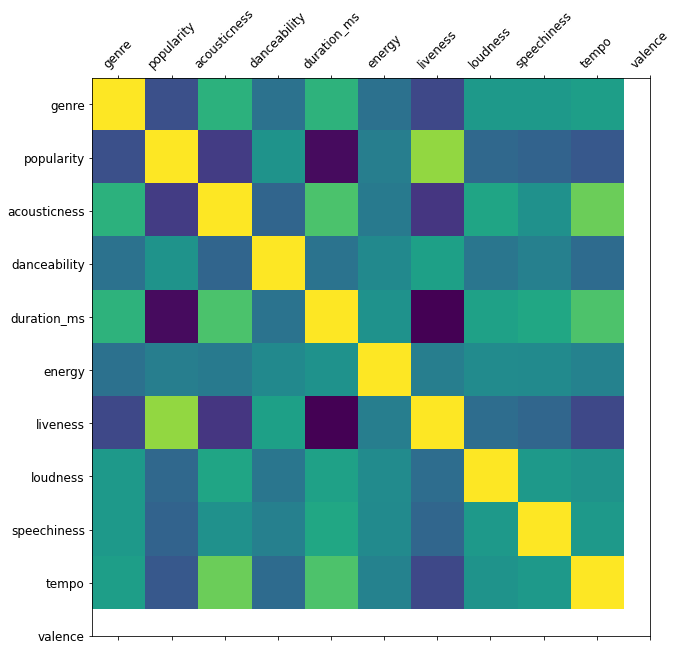

In [88]:
f = plt.figure(figsize=(30, 10))
plt.matshow(df.set_index(['genre']).corr(), fignum=f.number)
plt.xticks(list(range(len(df.columns))), df.columns, fontsize=12, rotation=45)
plt.yticks(list(range(len(df.columns))), df.columns, fontsize=12)
plt.show()

Un dato que nos resulto interesante analizar es la media de tiempo de las canciones que se encuentran en el dataset.

In [89]:
durations = df[["duration_ms"]]
durations["duration_seg"] = durations["duration_ms"] / 1000
durations

C:\Users\Agus\AppData\Local\Temp\ipykernel_15756\3102000834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durations["duration_seg"] = durations["duration_ms"] / 1000


,duration_ms,duration_seg
0,190440,190.440
1,208787,208.787
2,222653,222.653
3,220573,220.573
4,200773,200.773
...,...,...
995,146693,146.693
996,175427,175.427
997,303640,303.640
998,246787,246.787


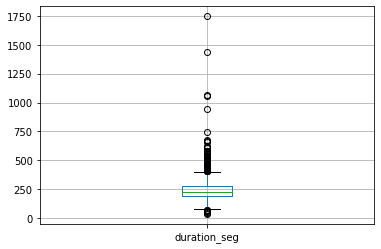

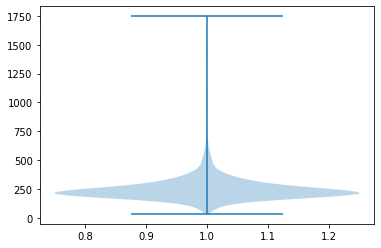

In [90]:
durations.boxplot(column=["duration_seg"])

fig, axes = plt.subplots()

axes.violinplot(dataset = [durations["duration_seg"]] )

plt.show()

Este boxplot nos muestra que casi la totalidad de las canciones tienen una duracion entre 100 y 400 segundos y que la media de duracion es aproximadamente menor a 240 segundos. El violinplot, por otro lado, muestra que la cantidad de canciones con una duracion similar a la media es alta.

<AxesSubplot:xlabel='genre'>

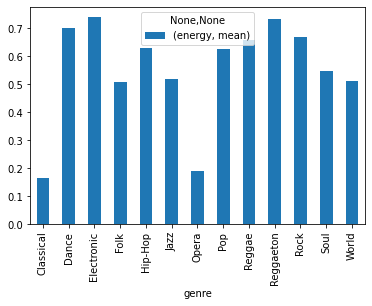

In [105]:
df.groupby("genre").agg({'energy': ['mean']}).plot.bar()

### 2) Preguntas

Planteamos las siguientes incógnitas a resolver:

- ¿Existe una relación entre lo "bailable" y enérgica que puede resultar una canción?
- ¿Aporta la acústica de una canción a su popularidad?

### 3) Respuestas

#### Entre lo Bailable y lo Energético

La hipótesis de la primera pregunta, es que existe una relación entre estas dos columnas ya que uno creería que cuanto más se pueda bailar una canción, mas energía tiene. Después de todo, nadie bailaría sobre obras clásicas o de opera que probablemente se pueden apreciar mejor en un contexto más tranquilo.

Vamos a tomar estos dos features y analizarlos en función del género musical:

In [91]:
danceability_and_energy = df[['genre', 'danceability', 'energy']]
danceability_and_energy

,genre,danceability,energy
0,Dance,0.73,0.55
1,Dance,0.78,0.61
2,Dance,0.74,0.64
3,Dance,0.59,0.70
4,Dance,0.73,0.65
...,...,...,...
995,Soul,0.59,0.38
996,Soul,0.45,0.64
997,Soul,0.51,0.62
998,Soul,0.67,0.57


Agrupamos los valores por género y los reducimos tomando la media de los mismos:

In [92]:
avg_danceability_and_energy = danceability_and_energy.groupby(['genre'])\
                                                     .mean()\
                                                     .sort_values(by=['danceability'])
avg_danceability_and_energy

,danceability,energy
genre,,
Opera,0.296111,0.188472
Classical,0.305556,0.165556
World,0.458228,0.510380
Folk,0.521250,0.508125
Rock,0.540125,0.670250
Jazz,0.592346,0.517531
Electronic,0.626173,0.740741
Soul,0.632031,0.545937
Dance,0.644400,0.700267


<AxesSubplot:xlabel='genre'>

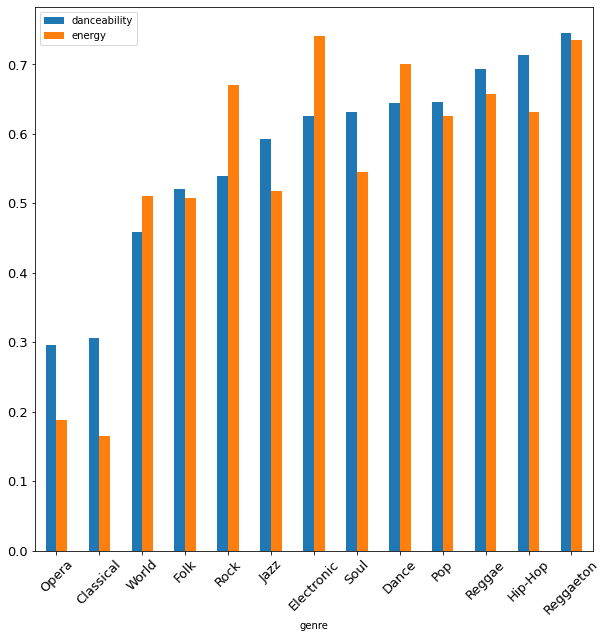

In [93]:
avg_danceability_and_energy.plot.bar(figsize = (10,10), 
                                     fontsize = 13, 
                                     rot = 45)

Podemos contemplar que cuanto más bailable es una canción, más enérgica suele ser. Esto tiene sentido pues es esperable que un género como el Reggaeton sea más "vivo" (bailable y enérgico) que la Opera.

Esto al fin y al cabo es una tendencia y no necesariamente se aplica a todos los casos. El rock que es menos bailable que el jazz, es más enérgico que este único. Podemos ver más limpiamente como esta tendencia aparece analizando los valores absolutos de las diferencias.

Esto se puede realizar gracias a que los dos features tienen valores que entran en el mismo rango de cero a uno:

In [94]:
peak_danceability_and_energy = danceability_and_energy.groupby(['genre'])\
                                                      .agg({'danceability': ['min', 'max'],
                                                            'energy': ['min', 'max']})
peak_danceability_and_energy

danceability       energy      
                    min   max    min   max
genre                                     
Classical          0.09  0.69   0.00  0.98
Dance              0.23  0.86   0.32  0.96
Electronic         0.24  0.93   0.21  1.00
Folk               0.26  0.80   0.06  0.99
Hip-Hop            0.45  0.91   0.11  0.95
Jazz               0.20  0.91   0.14  0.87
Opera              0.08  0.60   0.01  0.51
Pop                0.33  0.94   0.23  0.94
Reggae             0.38  0.95   0.30  0.95
Reggaeton          0.44  0.93   0.43  0.95
Rock               0.22  0.79   0.09  0.98
Soul               0.35  0.88   0.03  0.93
World              0.11  0.83   0.00  0.99

In [95]:
(peak_danceability_and_energy.danceability["max"].max() <= 1) and\
(peak_danceability_and_energy.energy["max"].max() <= 1) and\
(peak_danceability_and_energy.danceability["min"].min() >= 0) and\
(peak_danceability_and_energy.energy["min"].min() >= 0)

True

Al ser valores que viven en un mismo rango acotado, podemos computar la diferencia:

In [96]:
avg_danceability_and_energy

,danceability,energy
genre,,
Opera,0.296111,0.188472
Classical,0.305556,0.165556
World,0.458228,0.510380
Folk,0.521250,0.508125
Rock,0.540125,0.670250
Jazz,0.592346,0.517531
Electronic,0.626173,0.740741
Soul,0.632031,0.545937
Dance,0.644400,0.700267


In [97]:
danceability_and_energy_diff = avg_danceability_and_energy.copy()
danceability_and_energy_diff['diff'] = abs(danceability_and_energy_diff['danceability'] - danceability_and_energy_diff['energy'])
danceability_and_energy_diff = danceability_and_energy_diff[danceability_and_energy_diff.columns
                                                                                        .drop(['danceability', 'energy'])]
danceability_and_energy_diff

,diff
genre,
Opera,0.107639
Classical,0.140000
World,0.052152
Folk,0.013125
Rock,0.130125
Jazz,0.074815
Electronic,0.114568
Soul,0.086094
Dance,0.055867


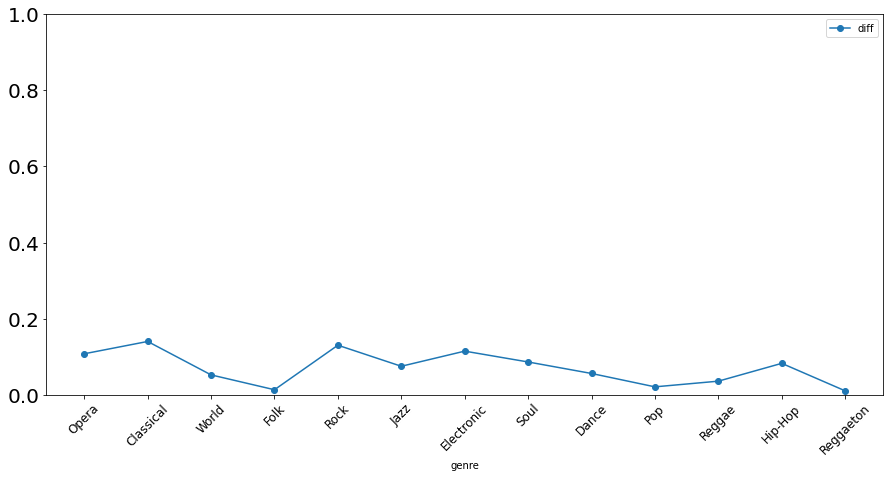

In [98]:
danceability_and_energy_diff.plot.line(figsize = (15,7), 
                                       fontsize = 20, 
                                       rot = 45,
                                       style="-o")
plt.ylim(0, 1)
diff_index = danceability_and_energy_diff.index
plt.xticks(list(range(len(diff_index))), diff_index, fontsize=12)
plt.show()

**Por lo tanto** notamos que en todos los géneros, no existe mucha diferencia entre lo bailable y enérgico que es una canción y entonces *tiende* a cumplirse la hipótesis propuesta.

#### Entre la Acústica y la Popularidad

Esta hipótesis se basa en la creencia de que el público general, cada vez tiende a escuchar géneros músicales menos [acústicos](https://es.wikipedia.org/wiki/M%C3%BAsica_ac%C3%BAstica#:~:text=La%20m%C3%BAsica%20ac%C3%BAstica%20es%20un,la%20manera%20el%C3%A9ctrica%20o%20electr%C3%B3nica.) y más electrónicos. Esto se nutre del dato de que géneros como el Pop y el Rock, son muy populares y poco acústicos a la vez y que la Opera y la música clásica se encuentran en el extremo opuesto del espectro. 

Iniciamos la investigación observando las coordenadas de relación entre las dos columnas:

NameError: name 'f1' is not defined

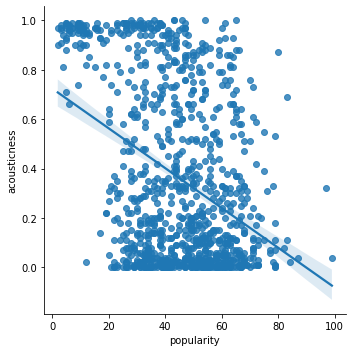

In [99]:
sns.lmplot(x = 'popularity', y = 'acousticness', data = df, fit_reg = True) 
sns.lmplot(x = 'popularity', y = 'acousticness', data = df.loc[df[f1] < 30], fit_reg = True) 
sns.lmplot(x = 'popularity', y = 'acousticness', data = df.loc[df[f1].between(30,60)], fit_reg = True) 
sns.lmplot(x = 'popularity', y = 'acousticness', data = df.loc[df[f1] > 60], fit_reg = True) 

Y podemos visualizar que las rectas que mejor se ajustan a estos puntos tienen pendientes negativas, por lo que se puede ver que estos dos features poseen una correlación negativa entre sí.

C:\Users\Agus\AppData\Local\Temp\ipykernel_15756\115883076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.popularity = a.popularity.apply(lambda p: p/100)


<AxesSubplot:ylabel='genre'>

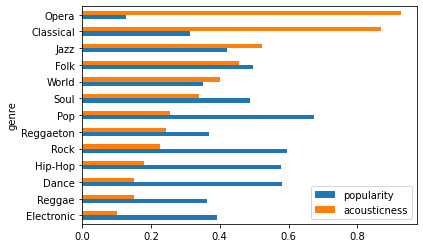

In [104]:
a = df[['genre', 'popularity', 'acousticness']]
a.popularity = a.popularity.apply(lambda p: p/100)
a.groupby('genre').mean().sort_values(by=['acousticness']).plot.barh()

No solo en general la correlación es negativa, sino que además, podemos notar que en general cuanto más acústico es un género menos popularidad tiene.